### A Primer on Time Series Data and Modeling

In this introductory chapter, we'll cover some of the important properties of time series. We'll look at some of the following questions:

What makes a time series a time series?
How do they differ from other types of dataset?
What do we need to think about when we attempt to model or forecast them?
These questions form a crucial basis for some of the later techniques we cover. Most importantly, knowing essential properties of time series will help us to make more considered modelling decisions: we may not choose the best model, but we'll be more aware of the potential flaws in the approach we choose.

Throughout the book, we will extensively use Python to create, visualize and model time series data. Some of the core libraries we will use are Numpy, Pandas, and Statsmodels. There will be others, introduced as we cover more advanced topics later on. Each notebook will have an import code block at the start, covering most of the primary libraries we will use.

Given my own interests, most of the examples in to follow will come from topics in finance or economics. I will try, however, to include applications from other subjects where I can.

<Axes: xlabel='time'>

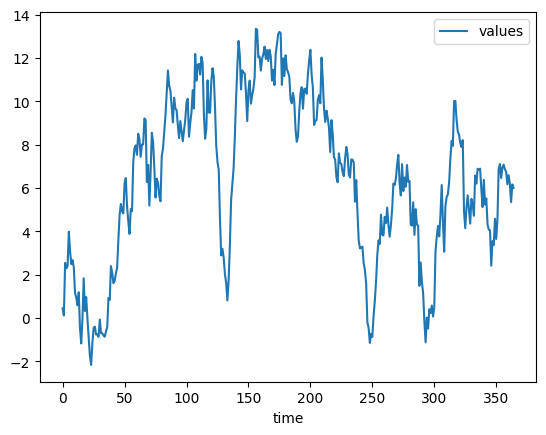

In [1]:
import numpy as np  # For random number generation and array operations.
import pandas as pd  # For creating and working with dataframes, to make manipulation easier.
#import seaborn as sns  # For plotting and visualising data.
#import statsmodels.api as sm  # For estimating models and forecasting time series.

np.random.seed(5)  # Set random seed, for reproducability.

# To start, we'll create some random data and plot it.
df = pd.DataFrame(dict(time=np.arange(365), values=np.random.randn(365).cumsum()))
df.plot(y="values", x="time")

In the above code, we generated 365 IID draws from a standardised Gaussian distribution, and cumulatively summed them up to generate a series. What we create, then, is a random walk, where a value is simply a random perturbation away from the value in the previous time period, where those random perturbations have a common distribution.

So what can we note about the data that makes this a time series? Fundamentally, the observations have some kind of chronological order: they come from successive (meaning one after the other) observations of the same unit. That unit could be a person, a business metric, or a physical process. Some examples of time series include the following:

- Price of Apple stock at the end of each trading day from 2004 - 2021.
- Average weekly temperature in Boston, USA over the course of year.
- ECG (heart monitor) activity for a patient in hospital.
- Cumulative proton emission from a star, by minute.

All of these data sets are time series, though we might not think of them as such (an ECG doesn't usually leap to mind as an example). The key is they all have a time-based ordering to the individual data points: we couldn't change their ordering and preserve the same information.

Because of the time-ordering of time series, the most obvious concern when modelling them is the possibility that one time period's value is in some way dependent on the value in the time period before. This becomes a problem for conventional modelling, because an observation won't be independent - it's related in some way to the value in the previous period. Serial correlation is a very common problem in time series modelling, and we'll cover methods for highlighting and dealing with the issue later on.

Serial correlation is one form of a broader class of statistical issues known as autocorelation. Another form of autocorrelation is spatial correlation: found in cross-sectional data, this can occur when observations are located in close spatial proximity. Their proximity leads to correlation in the errors of out model, and changes (for the worse) our ability to do statistical tests on parameter estimates. It also risks our model losing predictive ability out of sample.

Footnote:

There are several helpful books on time series, covering the topic in varying levels of complexity.

The canonical reference for many applications (especially in finance, economics, and social sciences) would be Hamilton's _Time Series Analysis_. The book is reasonably advanced, with a strong theoretical focus, and no examples in software. It's a useful reference text for the theory behind many time series techniques - with the added benefit of chapters on common estimators (OLS, MLE, GMM) and a short chapter on Bayesian statistics. While I think this text is a great reference, I don't like the ordering of the chapters if using the book as a textbooks. The treatment of unit roots and stationarity are mostly covered around halfway through the book.

A reference for specific applications in finance is Tsay's _Analysis of Financial Time Series_. While Hamilton's text is heavily theoretical, Tsay's has more applications of time series methods to the problems faced in financial applications. This was one of the reference texts I used in a class on Fincial Econometrics. I also like the order of the material in this text.

The below are two further references that I am less familiar with, but would also be options for reference.

A more accessible text for many, however, is _Applied Time Series Analysis_ by Mills. This text is less technical in nature than Hamilton, but contains a good coverage of the key topics in time series, along with many nice examples.

Finally, a reference for applications and Python code for time series is Lazerri's _Machine Learning for Time Series Forecasting with Python_. Expanding into the field of machine learning - unlike the classically oriented books above - this short work is a useful resource for the practitioner or learner looking for additional advice on how to apply the methods in Python.